In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('cardio_train.csv')
#test=pd.read_csv('cardio_test.csv')
#train['cardio']='Train' #Create a flag for Train and Test Data set
#test['cardio']='Test'

#fullData = pd.concat([train,test],axis=0) #Combined both Train and Test Data set

#1.	Age | Objective Feature | age | int (days)
#2.	Height | Objective Feature | height | int (cm) |
#3.	Weight | Objective Feature | weight | float (kg) |
#4.	Gender | Objective Feature | gender | categorical code |
#5.	Systolic blood pressure | Examination Feature | ap_hi | int |
#6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
#7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#9.	Smoking | Subjective Feature | smoke | binary |
#10.	Alcohol intake | Subjective Feature | alco | binary |
#11.	Physical activity | Subjective Feature | active | binary |
#12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |










df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [6]:
#test.head()

In [7]:
print("Training data")
print(df.describe())
#print(" ")
#print(" ")
#print(" ")
#print(" ")

#print("Testing data")
#print(test.describe())

Training data
                 id           age        gender        height        weight  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean   50471.480397  19468.786280      1.349519    164.362217     74.203027   
std    28563.100347   2467.261818      0.476821      8.205337     14.383469   
min      988.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25745.000000  17664.000000      1.000000    159.000000     65.000000   
50%    50494.000000  19704.000000      1.000000    165.000000     72.000000   
75%    75150.000000  21326.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean     128.829584     96.650092      1.366806      1.226447      0.088051   
std      154.775805    189.096240    

In [8]:
print("Training data")
print(df.isnull())
#print(" ")
#print(" ")
#print(" ")
#print(" ")

#print("Testing data")
#print(test.isnull())

Training data
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
0      False  False   False   False   False  False  False        False  False   
1      False  False   False   False   False  False  False        False  False   
2      False  False   False   False   False  False  False        False  False   
3      False  False   False   False   False  False  False        False  False   
4      False  False   False   False   False  False  False        False  False   
5      False  False   False   False   False  False  False        False  False   
6      False  False   False   False   False  False  False        False  False   
7      False  False   False   False   False  False  False        False  False   
8      False  False   False   False   False  False  False        False  False   
9      False  False   False   False   False  False  False        False  False   
10     False  False   False   False   False  False  False        False  False   
11     False  

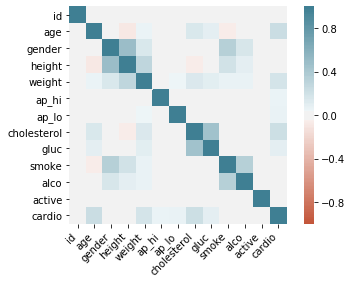

In [9]:
corr = df.corr()
chart = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df.columns = ['id','age','gender','height','weight',
              'ap_hi','ap_lo','cholesterol','gluc',
              'smoke','alco','active','cardio']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


######RANDOM FOREST CLASSIFIER###########



#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
x = df.drop(['cardio'],axis = 1)
y = df.cardio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[9029 3010]
 [3845 8372]]
Accuracy: 0.7173895118733509
Precision: 0.7355473554735548
Recall: 0.6852746173364983


Text(0.5, 257.44, 'Predicted Label')

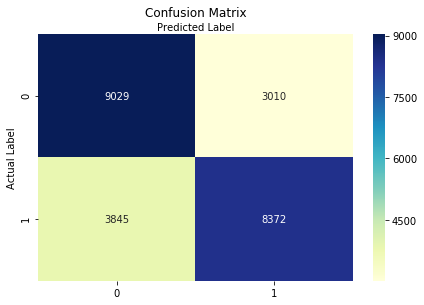

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

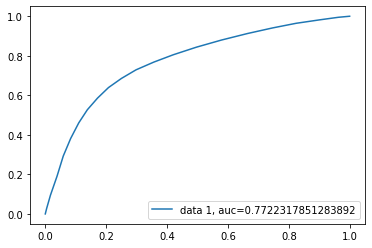

In [13]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
from sklearn import ensemble


######GRADIENT BOOSTING CLASSIFIER###########

gb_clf = ensemble.GradientBoostingClassifier()
#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
x = df.drop(['cardio'],axis = 1)
y = df.cardio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)

gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)
y_pred = gb_clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


[[9286 2753]
 [3660 8557]]
Accuracy: 0.7356118073878628
Precision: 0.7565870910698497
Recall: 0.7004174510927397


Text(0.5, 257.44, 'Predicted Label')

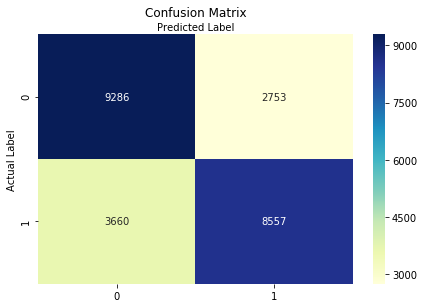

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

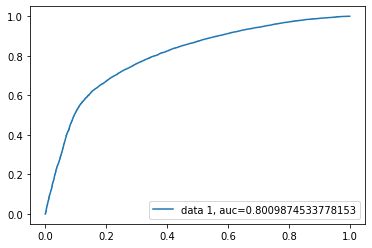

In [16]:
y_pred_proba = gb_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
